# Workflow for processing test Multi-timeline - Arboretum

In [1]:
import numpy as np
import sys
sys.path.append("..")

import time
start_time = time.time()

#
# Set up input and output directories
#
indir = '/g/data1a/u46/users/aw3463/GuyByrne/30APR18/Blanchetown/22APR18/'
output = '/g/data/u46/users/aw3463/GuyByrne/calval/PNGS/TMP/'

#
# field_data is in the format: 'Field Site Name', 'Date', 'Site number', 'Satellite Name'
# NOTE: Satellite name should be one of: 'Landsat8', 'Sentinel2a', or 'Sentinel2b'.
#
#
# field_data is in the format: 'Field Site Name', 'Date', 'Site number', 'Satellite Name', 'Panel origin', 'Reflectance/Radiance'.
# and 'Radiance'/'Reflectance'.
# NOTE: Satellite name should be one of: 'Landsat8', 'Sentinel2a', or 'Sentinel2b'.
#
field_data = ['BLA', '22APR18', '', 'Sentinel2a', 'UA_Panel', 'Radiance']

#
# bad_pans    contains the names of individual panels readings that appear to be bogus
# bad_grounds contains ground-reading file names that appear to be bogus
# Use empty lists if there are no bad spectra.
#
#bad_grounds = ['llg_l300010.asd.rad', 'llg_l300011.asd.rad', 'llg_l300038.asd.rad', 'llg_l300039.asd.rad', 'llg_l300040.asd.rad', 'llg_l300041.asd.rad']
bad_grounds = ['BTOWN_00275.asd.rad']
#bad_pans = ['lkg_l700000.asd.rad', 'lkg_l700001.asd.rad']
bad_pans = []

ls8_bad_days = ['2013-04-18', '2013-05-27', '2013-06-05', '2013-06-12', '2013-06-28', '2013-07-07',
                '2013-07-14', '2013-08-08', '2013-08-15', '2013-09-16', '2013-09-25', '2013-10-27',
                '2013-11-12', '2013-11-28', '2013-12-14', '2013-12-21', '2014-01-22', '2014-03-04',
                '2014-03-11', '2014-03-20', '2014-03-27', '2014-04-21', '2014-04-28', '2014-05-23',
                '2014-05-30', '2014-06-08', '2014-06-15', '2014-06-24', '2014-07-01', '2014-07-10',
                '2014-08-18', '2014-09-12', '2014-11-15', '2014-12-08', '2014-12-24', '2015-01-09',
                '2015-01-18', '2015-01-25', '2015-02-03', '2015-02-19', '2015-02-26', '2015-03-23',
                '2015-04-24', '2015-05-01', '2015-05-10', '2015-05-26', '2015-06-27', '2015-07-04',
                '2015-07-20', '2015-08-14', '2015-10-17', '2015-11-02', '2015-11-18', '2015-11-25',
                '2015-12-20', '2016-01-05', '2016-01-21', '2016-01-28', '2016-02-29', '2016-03-09',
                '2016-03-16', '2016-04-01', '2016-04-17', '2016-05-12', '2016-05-28', '2016-06-04',
                '2016-06-13', '2016-06-20', '2016-06-29', '2016-07-06', '2016-07-22', '2016-07-31',
                '2016-08-16', '2016-08-23', '2016-09-01', '2016-09-08', '2016-09-17', '2016-09-24',
                '2016-10-03', '2016-10-10', '2016-10-19', '2016-11-11', '2016-12-13', '2016-12-29',
                '2017-01-07', '2017-01-14', '2017-01-23', '2017-01-30', '2017-02-15', '2017-02-24',
                '2017-03-03', '2017-03-12', '2017-04-04', '2017-04-20', '2017-05-22', '2017-06-07',
                '2017-06-16', '2017-07-02', '2017-07-09', '2017-07-18', '2017-07-25', '2017-08-03',
                '2017-08-26', '2017-09-04', '2017-10-13', '2017-11-14', '2017-11-30', '2017-12-25',
                '2018-01-10', '2018-01-26', '2018-02-02', '2018-02-11', '2018-02-18', '2018-02-27',
                '2018-03-06', '2018-03-15', '2018-03-22', '2018-05-18', '2018-05-25', '2018-06-03',
                '2018-07-05', '2018-07-21', '2018-08-22', '2018-09-07', '2018-09-14', '2018-10-09',
                '2018-10-16', '2018-11-01', '2018-11-17', '2018-11-26', '2018-12-12', '2019-01-04']
s2a_bad_days = ['2015-09-03', '2015-10-23', '2015-11-12', '2015-11-22', '2015-12-22', '2016-01-31',
                '2016-04-30', '2016-06-09', '2016-06-19', '2016-07-09', '2016-07-19', '2016-07-29',
                '2016-08-28', '2016-09-07', '2016-09-17', '2016-09-27', '2016-10-07', '2016-10-17',
                '2016-11-06', '2016-12-06', '2016-12-16', '2016-12-26', '2017-01-05', '2017-02-04',
                '2017-02-14', '2017-03-16', '2017-04-05', '2017-04-15', '2017-04-25', '2017-05-05',
                '2017-05-25', '2017-06-14',
                '2017-07-14', '2017-07-24', '2017-10-22', '2017-11-11', '2017-12-21', '2017-12-31',
                '2018-01-10', '2018-02-19', '2018-03-21', '2018-03-31', '2018-04-10', '2018-05-10',
                '2018-05-20', '2018-05-30', '2018-06-09', '2018-06-19', '2018-06-29', '2018-08-08',
                '2018-09-07', '2018-10-07', '2018-10-17', '2018-11-06', '2018-11-16', '2018-11-26',
                '2018-12-16']
s2b_bad_days = ['2017-07-09', '2017-07-19', '2017-07-29', '2017-08-18', '2017-09-07', '2017-10-27',
                '2017-11-06', '2017-11-16', '2017-12-06', '2017-12-26', '2018-01-15', '2018-02-24',
                '2018-03-06', '2018-03-16', '2018-04-15', '2018-04-25', '2018-05-25', '2018-06-04',
                '2018-06-14', '2018-08-13', '2018-08-23', '2018-09-02', '2018-09-12', '2018-09-22',
                '2018-10-12', '2018-12-11', '2018-12-21']

ls8_csvs = ['BLA_22APR18__Landsat8.csv']
sent_csvs = ['BLA_22APR18__Sentinel2a.csv']

rain_dat = '../Weather/IDCJAC0009_070351_1800_Data.csv'

#
# Define the first line and spectrum number for all/good panels and grounds
#
firstGoodLine = 1
firstGoodPanelSpec = 2
firstGoodGroundSpec = 32

#
# Calculated BRDF data
#
brdf_data = np.array([['', 'brdf0', 'brdf1', 'brdf2'],
                          ['band1', 0.034192, 0.034796, 0.006668000000000001],
                          ['band11', 0.10967600000000001, 0.035744000000000005, 0.025232],
                          ['band12', 0.06937600000000001, 0.019912000000000003, 0.016632],
                          ['band2', 0.034192, 0.034796, 0.006668000000000001],
                          ['band3', 0.06402000000000001, 0.040524000000000004, 0.015156000000000001],
                          ['band4', 0.061020000000000005, 0.036208, 0.016488],
                          ['band5', 0.061020000000000005, 0.036208, 0.016488],
                          ['band6', 0.061020000000000005, 0.036208, 0.016488],
                          ['band7', 0.12706800000000001, 0.053164, 0.029604000000000002],
                          ['band8', 0.12706800000000001, 0.053164, 0.029604000000000002],
                          ['band8a', 0.12706800000000001, 0.053164, 0.029604000000000002],
                         ])

#
# plot_scale defines the extent of the axes in the final two plots in the workflow.
# A scale from 0-1 means no reflectance to perfect reflectance. Typically, dark sites
# will range from 0-0.3, whereas bright sites will be between 0-1.
#
plot_scale = [0.0, 0.6, 0.0, 0.6]

#
# Define corners of field data, if GPS coordinates are NOT written into headers.
# Order is SE, SW, NE, NW. Units are decimal degrees.
# If there are no coordinates, then set RockWalk to either True or False.
# True  means that the field site was walked in a rock-like pattern (alternating directions),
# False means that the field site was walked in a roll-like pattern (same direction)
#
Corners = [0,0,0,0,0,0,0,0] 
RockWalk = True
StartCorner = 'SE'

In [2]:
import matplotlib.pyplot as plt
import matplotlib

#
# Astropy is used to determine the Solar angle
#
import astropy.coordinates as coord
from astropy.time import Time
import astropy.units as u

import datacube

from CalVal import *

#
# Use notebook format (allows inline zooming and moving of figures)
# Set default font size for all plots
#
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams['savefig.dpi'] = 300

### Query Satellite data

Retrieve xarrays for satellite data, based on which satellite, query area and time.<BR>
sat_array will contain all band data<BR>
sat_bigarray will be a larger version of sat_array, which can be used for context plotting.

In [3]:
ls8_array, s2a_array, s2b_array = CreateLongSHPArrays.create_long_SHP_arrays('../ShapeFiles/Arboretum/Arboretum.shp')

# Figure 

### Plot large-area context RGB array for Satellite data

Landsat 8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


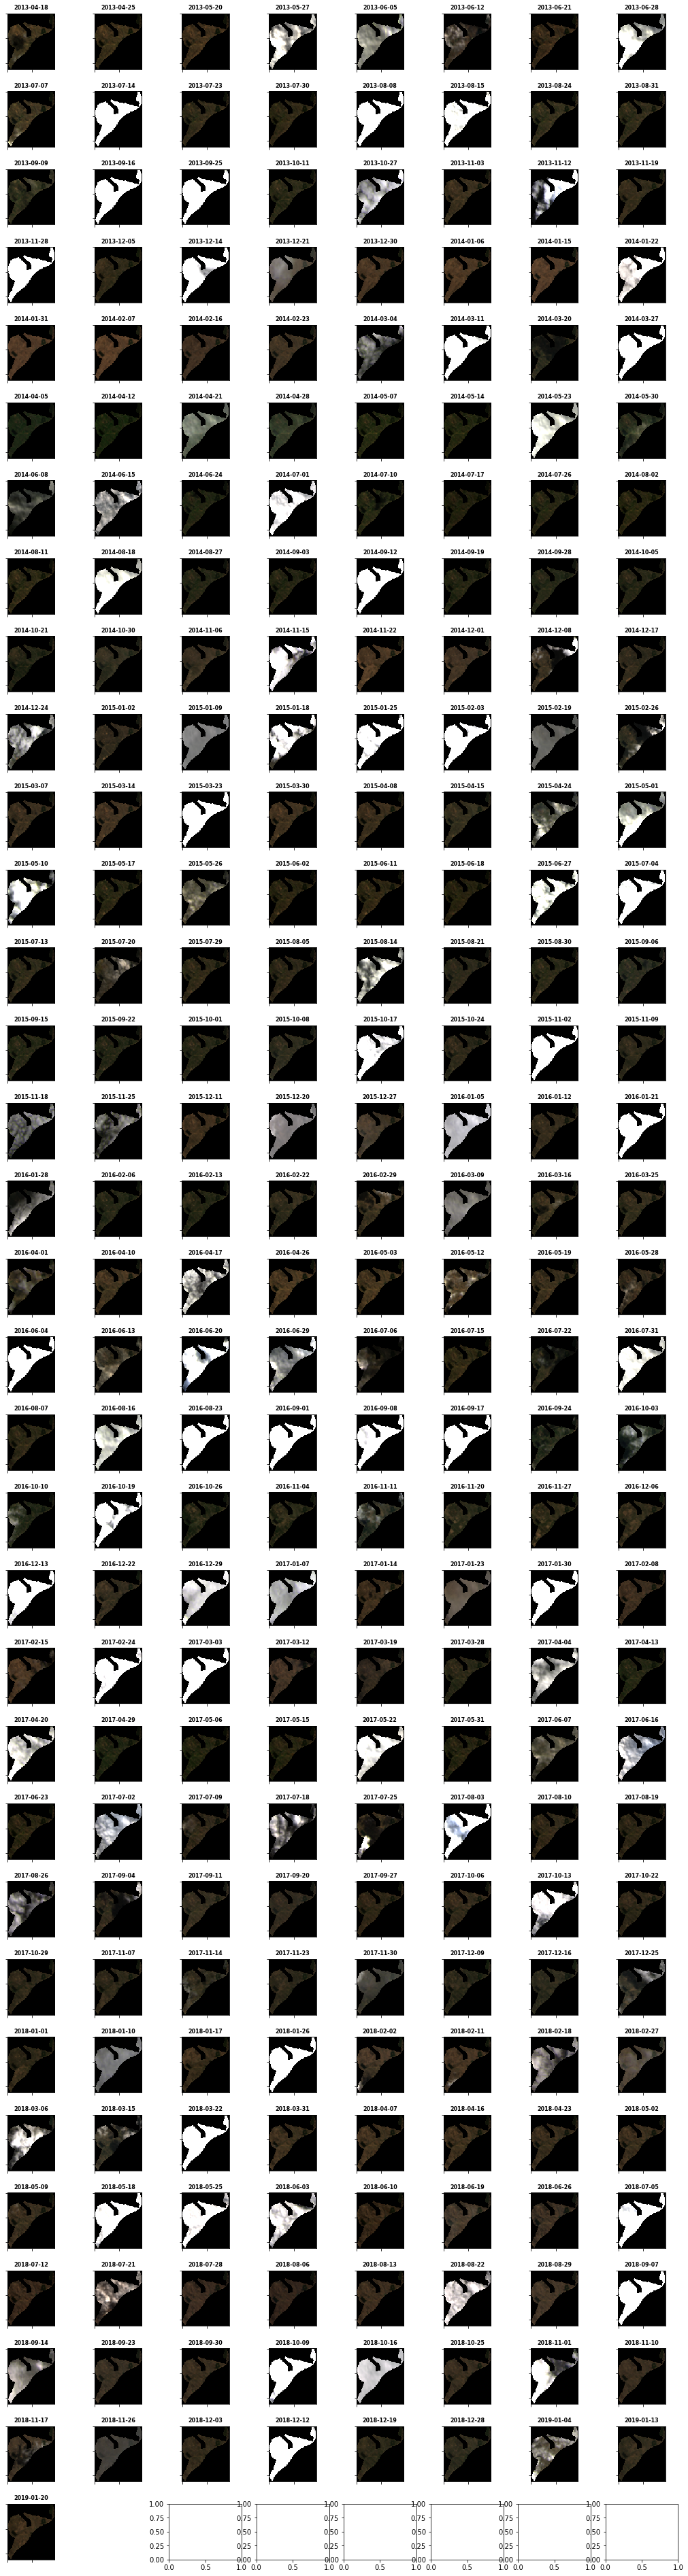

In [4]:
fignum = 1
FIG_ManyLS8RGB.FIG_many_LS8RGB(ls8_array, output, field_data, fignum)
fignum += 1

Sentinel 2a


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

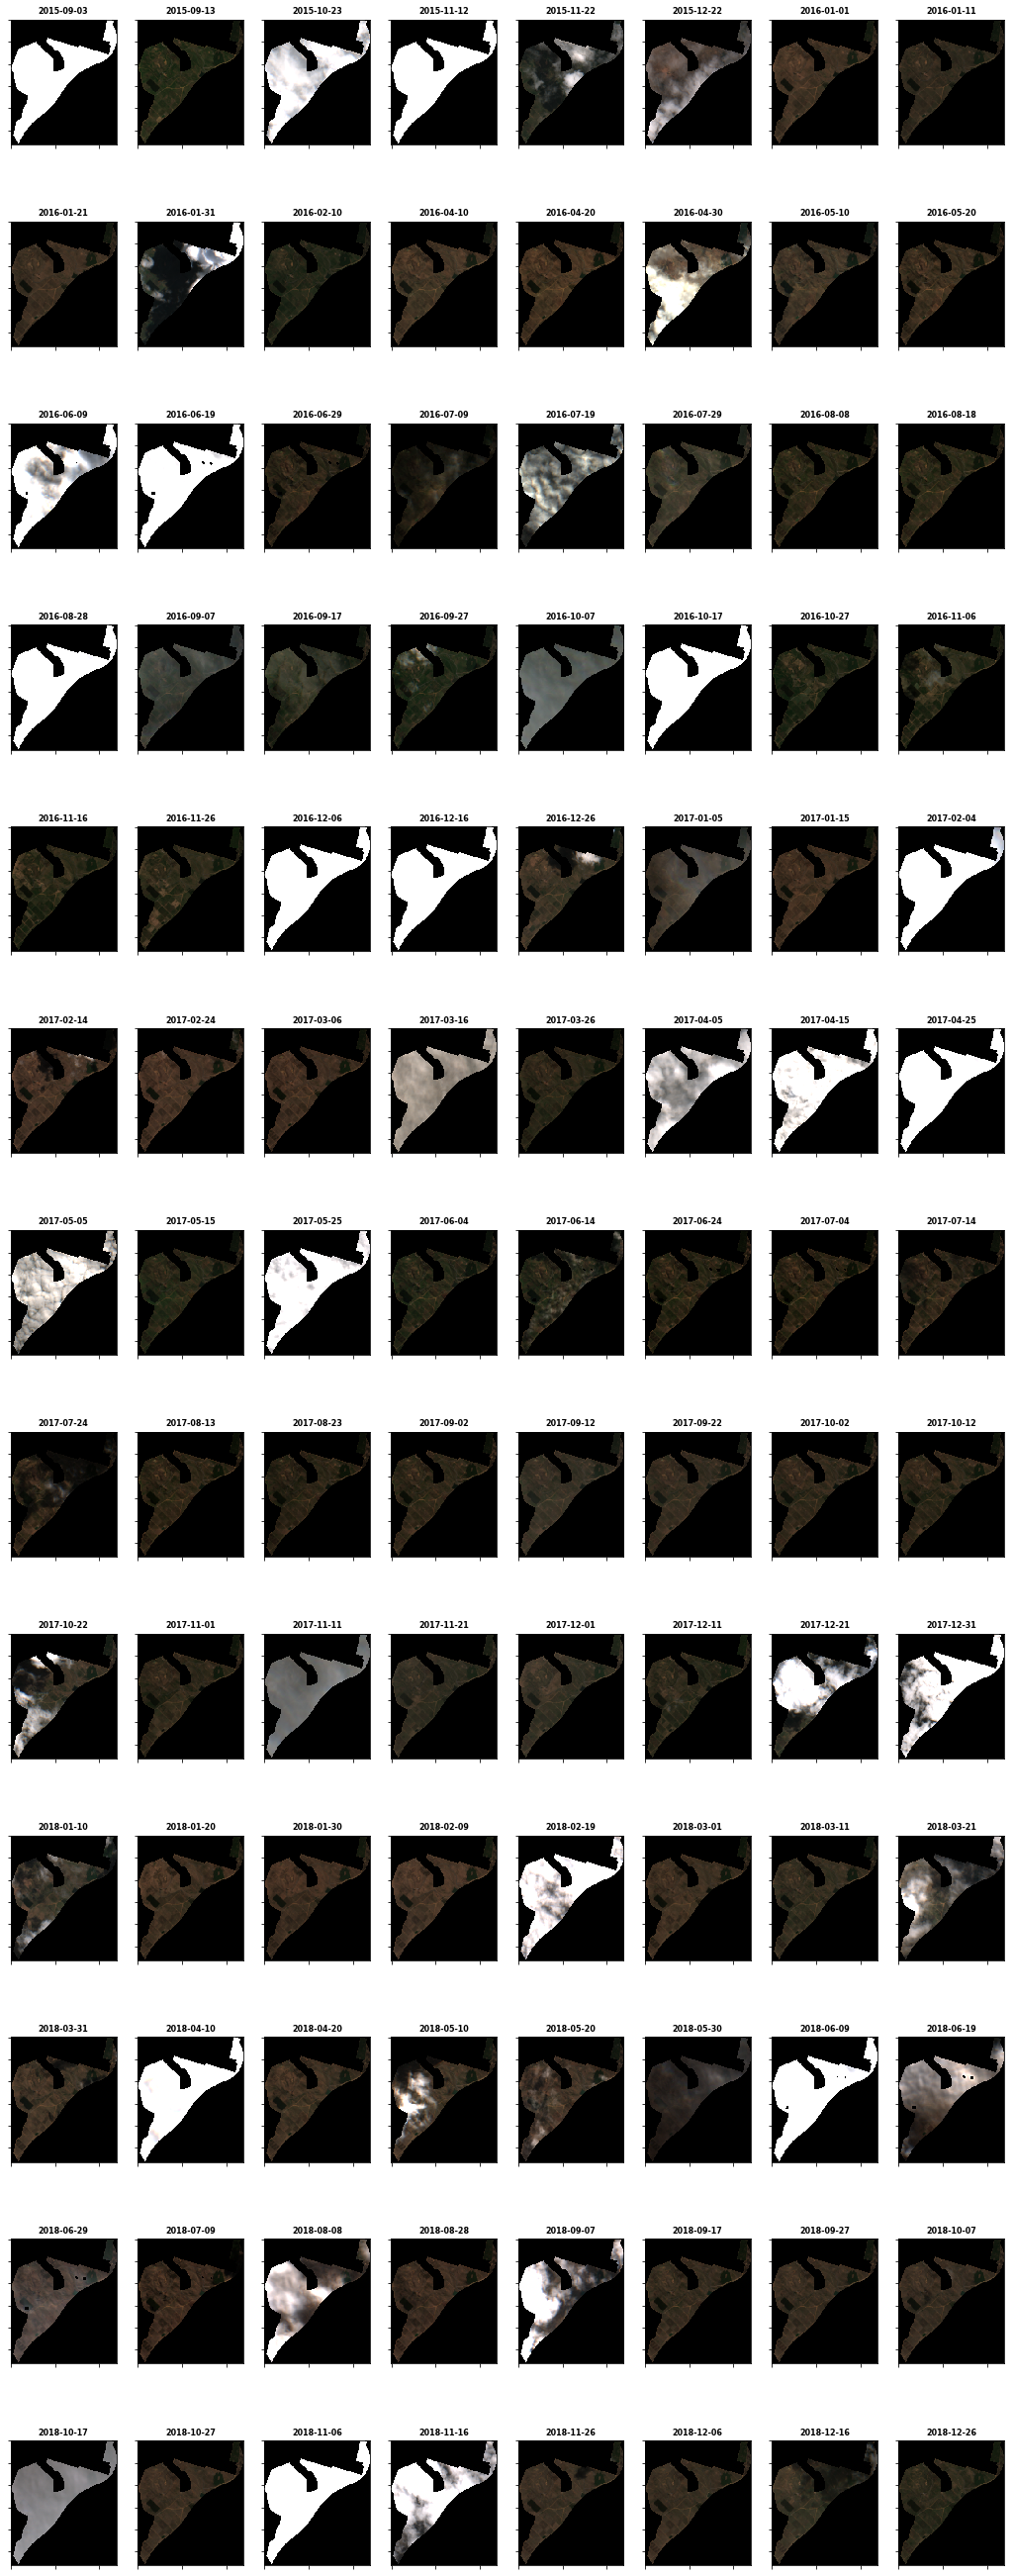

In [5]:
FIG_ManyS2ARGB.FIG_many_S2ARGB(s2a_array, output, field_data, fignum)
fignum += 1

Sentinel 2b


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

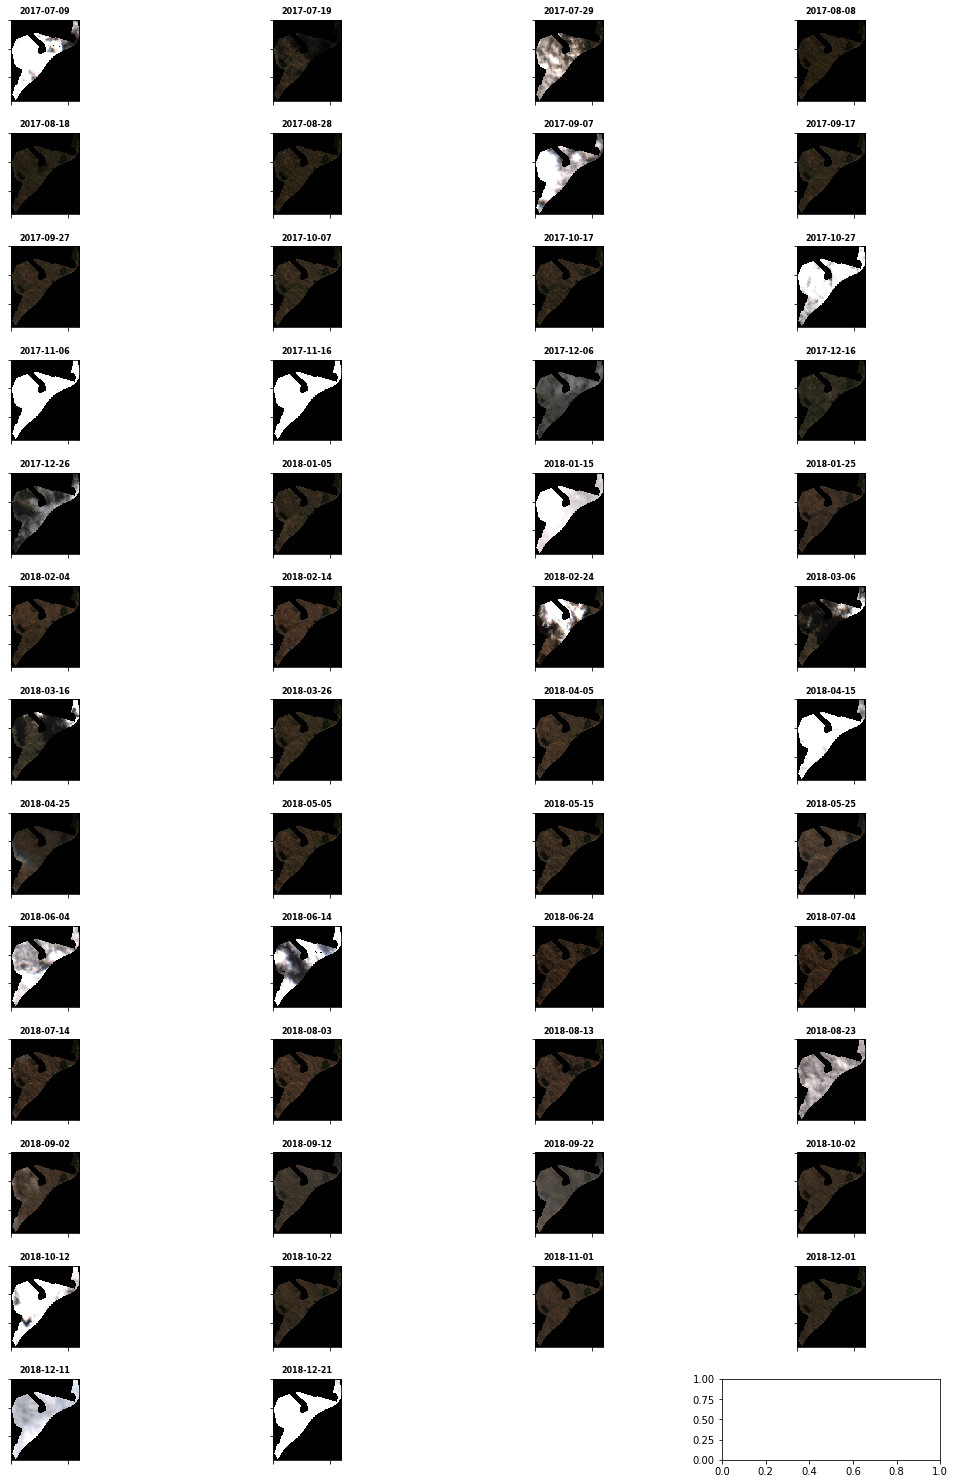

In [6]:
FIG_ManyS2BRGB.FIG_many_S2BRGB(s2b_array, output, field_data, fignum)
fignum += 1

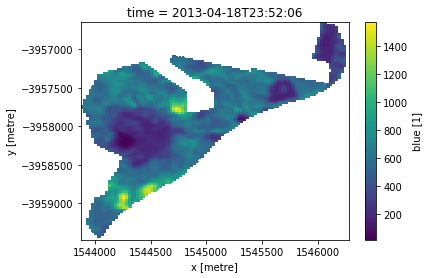

In [7]:
ls8_array.blue[0].plot()

### Create a statistics dataframe, comparing satellite and field data

In [9]:
ground_brdf_ls8 = []
ground_brdf_s2a = []
fls8_df, fs2a_df, fs2b_df = CreateManyStats.create_manystats(ls8_array, s2a_array, s2b_array, ls8_bad_days, s2a_bad_days, s2b_bad_days, ground_brdf_ls8, ground_brdf_s2a, field_data)

# Figure

### Plot comparison spectra of satellite and field data, on a pixel-by-pixel basis

Error bars are shown for the satellite and field data, based on the standard deviation of the pixels
within the field. The black line shows the satellite data, which has been averaged over all pixels that satisfy the Datacube query ie. all pixels shown in Figure 11. The orange line shows satellite data which has been averaged over only those pixels that overlap with at least one field measurement.

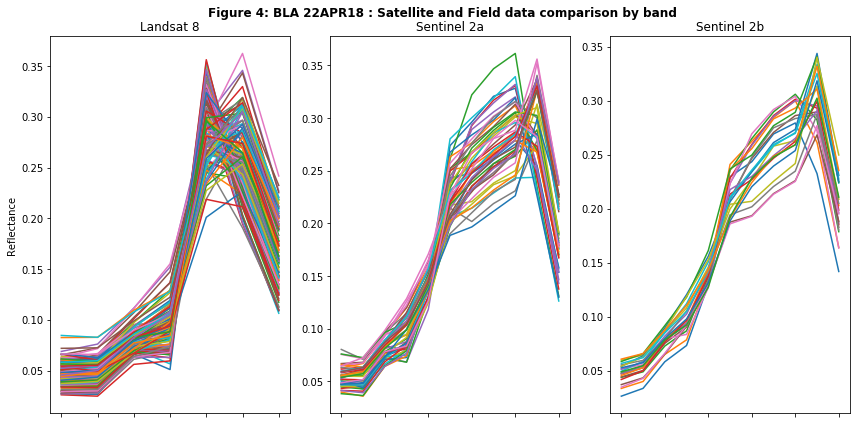

In [10]:
FIG_ManySatFieldBands.FIG_many_sat_field_bands(ls8_array, s2a_array, s2b_array, fls8_df, fs2a_df, fs2b_df, output, field_data, fignum)
fignum += 1

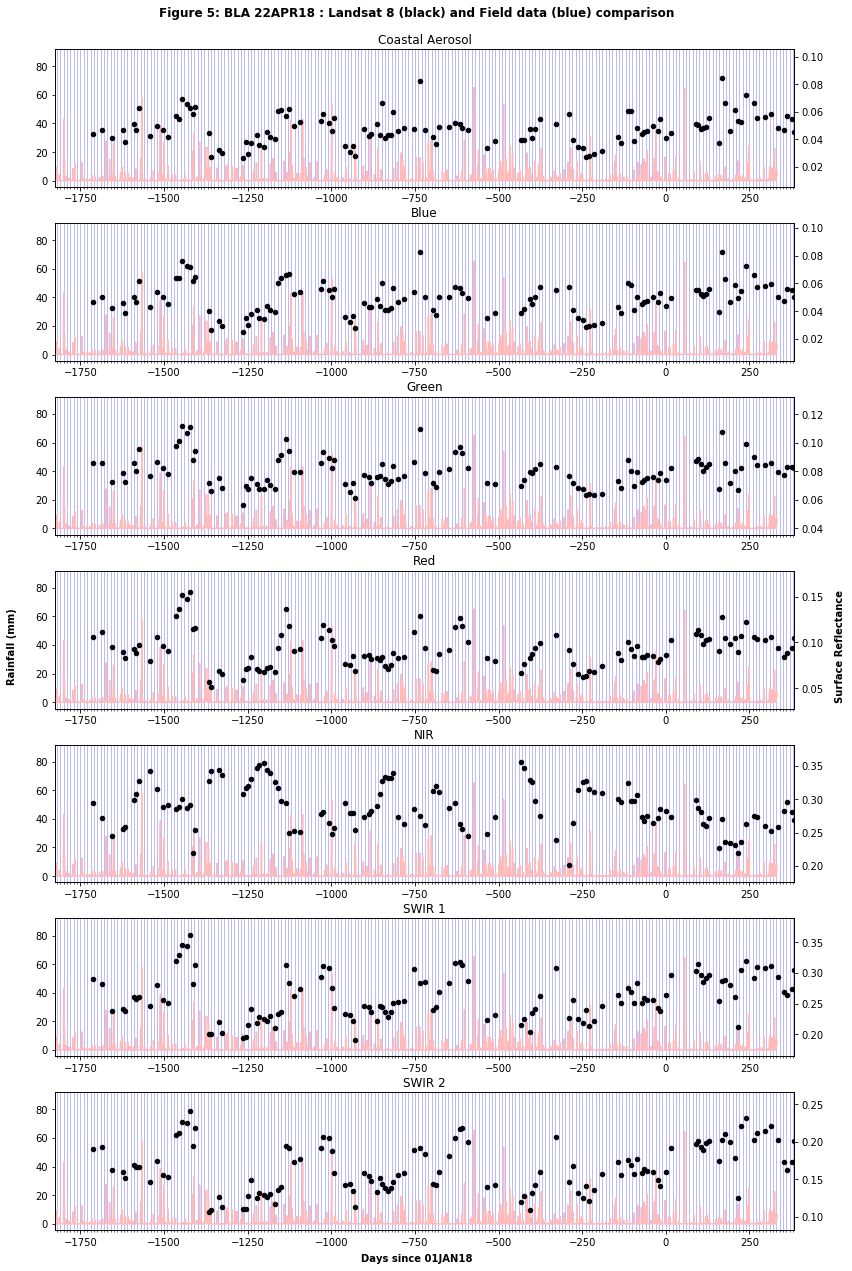

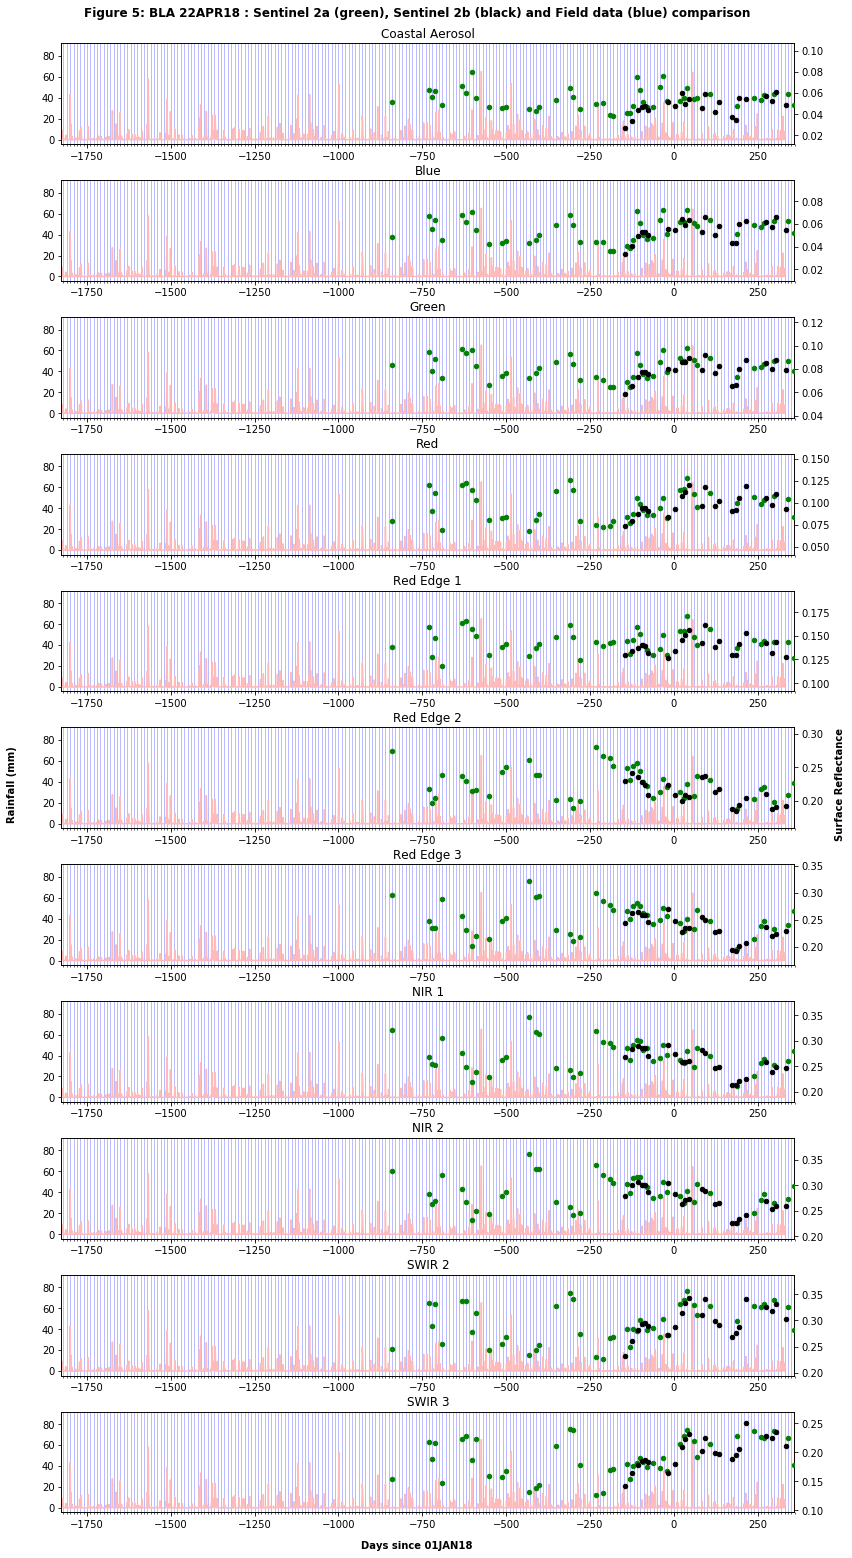

In [11]:
ls8_csvs, sent_csvs = [], []
FIG_MultiTimeLine.FIG_multi_time_line(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)
fignum+=1

In [12]:
dd0_ls8, dd1_ls8, dd0_s2a, dd1_s2a, dd0_s2b, dd1_s2b = CalcStats.calc_stats(fls8_df, fs2a_df, fs2b_df)

LANDSAT 8: Number of adjacent overpasses: 125
Landsat 8 Surface Reflectance for Band 1 is 0.048+/-0.011 (23.84%)
Landsat 8 Surface Reflectance for Band 2 is 0.049+/-0.01 (20.63%)
Landsat 8 Surface Reflectance for Band 3 is 0.08+/-0.01 (12.03%)
Landsat 8 Surface Reflectance for Band 4 is 0.093+/-0.012 (13.29%)
Landsat 8 Surface Reflectance for Band 5 is 0.291+/-0.02 (6.76%)
Landsat 8 Surface Reflectance for Band 6 is 0.26+/-0.024 (9.04%)
Landsat 8 Surface Reflectance for Band 7 is 0.164+/-0.02 (11.96%)

SENTINEL 2a: Number of adjacent overpasses: 47
Sentinel 2a Surface Reflectance for Band 1 is 0.057+/-0.012 (21.16%)
Sentinel 2a Surface Reflectance for Band 2 is 0.057+/-0.011 (18.71%)
Sentinel 2a Surface Reflectance for Band 3 is 0.083+/-0.01 (12.32%)
Sentinel 2a Surface Reflectance for Band 4 is 0.099+/-0.013 (13.26%)
Sentinel 2a Surface Reflectance for Band 5 is 0.147+/-0.013 (9.07%)
Sentinel 2a Surface Reflectance for Band 6 is 0.228+/-0.015 (6.45%)
Sentinel 2a Surface Reflectance fo

In [13]:
#MultiTimeLineDry.multi_time_line_dry(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)

In [14]:
#FIG_MultiTimeLine.FIG_multi_time_line(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)
#fignum+=1

In [15]:
#dd0_ls8, dd1_ls8, dd0_s2a, dd1_s2a, dd0_s2b, dd1_s2b = CalcStats.calc_stats(fls8_df, fs2a_df, fs2b_df)

## How long did this notebook take to run?

In [16]:
import datetime
print("This Notebook took ", str(datetime.timedelta(seconds=int((time.time() - start_time)))), "(h:m:s) to run")

This Notebook took  0:15:22 (h:m:s) to run
